# Illustration of sentiment analysis

In [1]:
#! conda install pytorch torchvision torchaudio cpuonly -c pytorch
#! pip install transformers

In [2]:
from pynytimes import NYTAPI
from transformers import pipeline
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from tqdm.notebook import  tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
apiinfo=pd.read_csv("NY-API.csv")


In [4]:
nyt = NYTAPI(str(apiinfo["API-KEY"].values[0]), parse_dates=True)

In [5]:
pd. set_option('display.max_colwidth', -1)

<ipython-input-5-3502c1cad7d7>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd. set_option('display.max_colwidth', -1)


In [6]:
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

In [7]:
def processOneMonth(date):
    articles = nyt.article_search(
        query = "",
        results = 200,
        dates = {
            "begin": date,
            "end":date+ relativedelta(day=31)
        },
        options = {
            "sort": "oldest",
            "sources": [
                "New York Times",
               
            ],

        }
    )

    results=[]
    i=1
    for t in articles:
        try:
            res=classifier(t['lead_paragraph'])
            res[0].append({'label': 'lead paragraph', 'score':t['lead_paragraph'],\
                           })
            df=pd.DataFrame(res[0]).set_index("label")
            df=df.rename(columns={"score":"article "+str(i)})
            i+=1
            results.append(df)
        except:
            pass
    res=pd.concat(results,axis=1).T
    summary=dict()
    summary["Date"]=date
    summary["sadness"]=[(res["sadness"]>=0.5).sum()/res.shape[0]]
    summary["anger"]=[(res["anger"]>=0.5).sum()/res.shape[0]]
    summary["fear"]=[(res["fear"]>=0.5).sum()/res.shape[0]]
    summary["joy"]=[(res["joy"]>=0.5).sum()/res.shape[0]]
    summary["love"]=[(res["love"]>=0.5).sum()/res.shape[0]]
    summary["surprise"]=[(res["surprise"]>=0.5).sum()/res.shape[0]]
    summary["neg"]=[np.sum((res["sadness"]+res["anger"]+res["fear"])>=0.5)/res.shape[0]]
    summary["pos"]=[np.sum((res["joy"]+res["love"])>=0.5)/res.shape[0]]
    summary=pd.DataFrame.from_dict(summary)
 
    return res,summary

In [8]:
dates=pd.date_range(start='1/1/2019', end='3/1/2022',freq=pd.offsets.MonthBegin())
dates

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [9]:
%%time
res,summary=processOneMonth(dates[-1])
res

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


Wall time: 1min


label,sadness,joy,love,anger,fear,surprise,lead paragraph
article 1,0.000824,0.994516,0.003462,0.000714,0.000232,0.000252,"February was a busy month—between Valentine’s Day and the big football game, our readers had a lot on their shopping lists. Many readers bought flowers and chocolates to celebrate with family and friends, while others bought our favorite speakers and TV accessories to make their football celebrations even better. And our recommended masks and air..."
article 2,0.018927,0.000985,0.000459,0.972691,0.006707,0.000232,"Ask Wirecutter, an advice column written by Annemarie Conte, explores the best approaches to buying, using, and maintaining stuff. Email your biggest product-related problems to askwirecutter@wirecutter.com. Dear Wirecutter, My dog refuses to go outside in any kind of bad weather, and I hate dragging her down my front steps by her leash. Is there a..."
article 3,0.084172,0.024863,0.001516,0.88326,0.005391,0.000799,"Beware, Vladimir Putin: Spring is coming. And when it does, you’ll lose much of whatever leverage you had left."
article 4,0.015305,0.736964,0.005737,0.186279,0.05208,0.003634,Follow our live updates on the Texas primary election and election results.
article 5,0.001364,0.995029,0.000713,0.001593,0.000868,0.000434,"WASHINGTON — President Biden will use his first State of the Union address on Tuesday to claim credit for a robust economy and a unified global response to Russia’s invasion of Ukraine, even as he acknowledges the pain of inflation and the struggle between “democracy and autocracy” around the world, administration officials said on Monday."
...,...,...,...,...,...,...,...
article 196,0.04444,0.258183,0.014893,0.476906,0.195077,0.010501,See full results and maps from the Texas primary elections.
article 197,0.04444,0.258183,0.014893,0.476906,0.195077,0.010501,See full results and maps from the Texas primary elections.
article 198,0.04444,0.258183,0.014893,0.476906,0.195077,0.010501,See full results and maps from the Texas primary elections.
article 199,0.04444,0.258183,0.014893,0.476906,0.195077,0.010501,See full results and maps from the Texas primary elections.


In [10]:
summary

,Date,sadness,anger,fear,joy,love,surprise,neg,pos
0,2022-03-01,0.09,0.28,0.165,0.3,0.005,0.0,0.68,0.315


In [11]:
results=[]
summaries=[]
for d in tqdm(dates):
    res,summary=processOneMonth(d)
    results.append(res)
    summaries.append(summary)
results=pd.concat(results)
summaries=pd.concat(summaries)
summaries.set_index("Date",inplace=True)

  0%|          | 0/39 [00:00<?, ?it/s]

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (619 > 512). Running this sequence through the model will result in indexing errors


In [12]:

summaries

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2019-01-01,0.060000,0.150000,0.100000,0.47000,0.010000,0.015000,0.495000,0.485000
2019-02-01,0.080000,0.240000,0.085000,0.43500,0.020000,0.010000,0.535000,0.455000
2019-03-01,0.045000,0.275000,0.085000,0.46000,0.010000,0.010000,0.515000,0.470000
2019-04-01,0.120000,0.235000,0.105000,0.41000,0.010000,0.005000,0.570000,0.420000
2019-05-01,0.085000,0.275000,0.105000,0.42000,0.010000,0.015000,0.550000,0.435000
2019-06-01,0.080000,0.275000,0.105000,0.41000,0.010000,0.000000,0.535000,0.465000
2019-07-01,0.050000,0.210000,0.130000,0.48500,0.015000,0.000000,0.485000,0.505000
2019-08-01,0.055000,0.320000,0.105000,0.43500,0.010000,0.010000,0.545000,0.445000
2019-09-01,0.110000,0.225000,0.135000,0.41500,0.000000,0.000000,0.570000,0.430000


<AxesSubplot:xlabel='Date'>

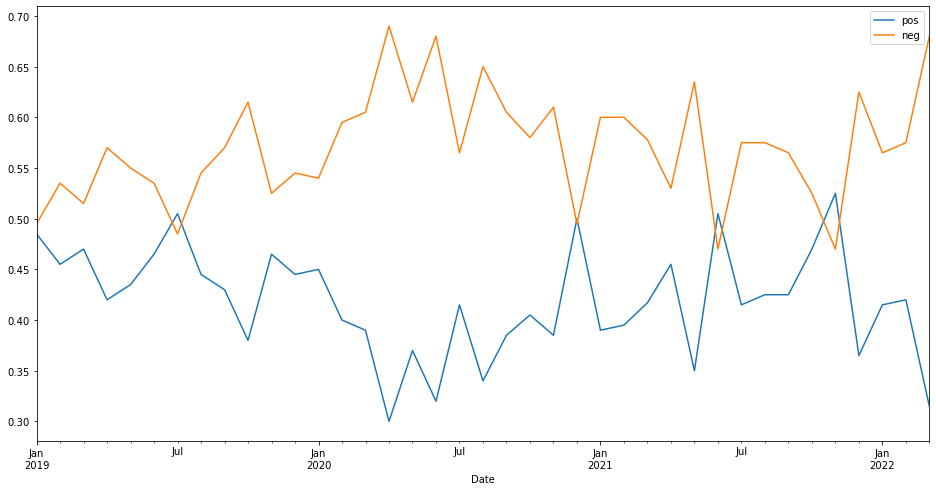

In [13]:
summaries[["pos","neg"]].plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

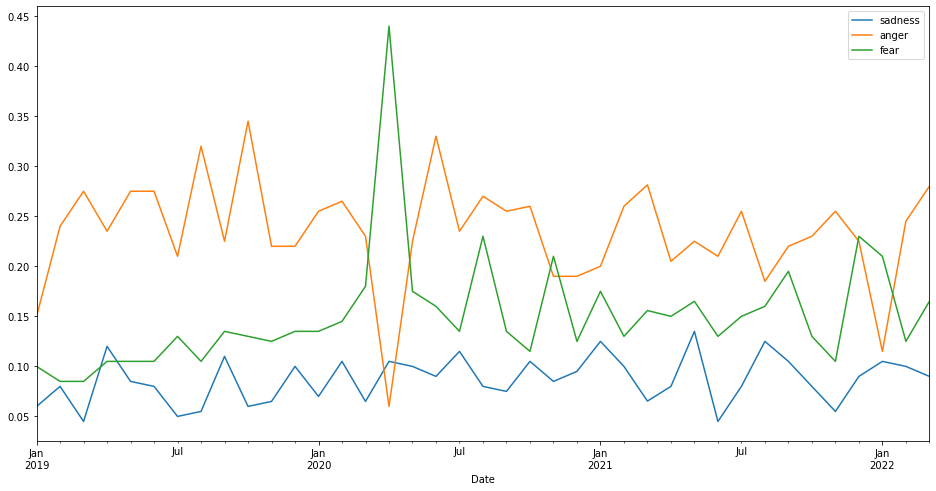

In [14]:
summaries[["sadness","anger","fear"]].plot(figsize=(16,8))

In [16]:
dates=pd.date_range(start='1/1/2016', end='12/1/2018',freq=pd.offsets.MonthBegin())
results2=[]
summaries2=[]
for d in tqdm(dates):
    res,summary=processOneMonth(d)
    results2.append(res)
    summaries2.append(summary)
results2=pd.concat(results2)
summaries2=pd.concat(summaries2)
summaries2.set_index("Date",inplace=True)

  0%|          | 0/36 [00:00<?, ?it/s]

In [17]:
summaries2

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2016-01-01,0.065000,0.245000,0.130000,0.455000,0.020,0.010000,0.510000,0.48000
2016-02-01,0.045000,0.290000,0.135000,0.430000,0.005,0.010000,0.545000,0.44500
2016-03-01,0.065000,0.275000,0.140000,0.375000,0.020,0.005000,0.585000,0.40500
2016-04-01,0.070000,0.200000,0.095000,0.490000,0.005,0.015000,0.475000,0.49500
2016-05-01,0.080000,0.355000,0.105000,0.355000,0.000,0.005000,0.610000,0.37500
2016-06-01,0.095000,0.285000,0.135000,0.385000,0.005,0.005000,0.595000,0.39500
2016-07-01,0.050251,0.291457,0.130653,0.386935,0.000,0.005025,0.592965,0.39196
2016-08-01,0.070000,0.305000,0.145000,0.385000,0.000,0.015000,0.600000,0.38500
2016-09-01,0.085000,0.290000,0.100000,0.440000,0.015,0.005000,0.540000,0.45500


In [18]:
dates=pd.date_range(start='1/1/2014', end='12/1/2015',freq=pd.offsets.MonthBegin())
results3=[]
summaries3=[]
for d in tqdm(dates):
    res,summary=processOneMonth(d)
    results3.append(res)
    summaries3.append(summary)
results3=pd.concat(results3)
summaries3=pd.concat(summaries3)

summaries3.set_index("Date",inplace=True)

  0%|          | 0/24 [00:00<?, ?it/s]

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [19]:
summaries3

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2014-01-01,0.070,0.335,0.185,0.330,0.005,0.005,0.650,0.345
2014-02-01,0.095,0.275,0.110,0.345,0.005,0.010,0.620,0.365
2014-03-01,0.090,0.300,0.170,0.315,0.015,0.005,0.665,0.330
2014-04-01,0.065,0.270,0.145,0.400,0.000,0.005,0.590,0.400
2014-05-01,0.095,0.290,0.180,0.315,0.005,0.015,0.660,0.325
2014-06-01,0.050,0.245,0.155,0.375,0.005,0.000,0.585,0.415
2014-07-01,0.065,0.320,0.125,0.345,0.005,0.005,0.645,0.350
2014-08-01,0.075,0.270,0.130,0.395,0.010,0.010,0.580,0.410
2014-09-01,0.075,0.245,0.225,0.345,0.010,0.000,0.645,0.355


In [20]:
sum_all=pd.concat([summaries3,summaries2,summaries],axis=0)
sum_all

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2014-01-01,0.070,0.335,0.185,0.330,0.005,0.005,0.650,0.345
2014-02-01,0.095,0.275,0.110,0.345,0.005,0.010,0.620,0.365
2014-03-01,0.090,0.300,0.170,0.315,0.015,0.005,0.665,0.330
2014-04-01,0.065,0.270,0.145,0.400,0.000,0.005,0.590,0.400
2014-05-01,0.095,0.290,0.180,0.315,0.005,0.015,0.660,0.325
...,...,...,...,...,...,...,...,...
2021-11-01,0.055,0.255,0.105,0.510,0.010,0.000,0.470,0.525
2021-12-01,0.090,0.225,0.230,0.355,0.010,0.000,0.625,0.365
2022-01-01,0.105,0.115,0.210,0.395,0.020,0.015,0.565,0.415


<AxesSubplot:xlabel='Date'>

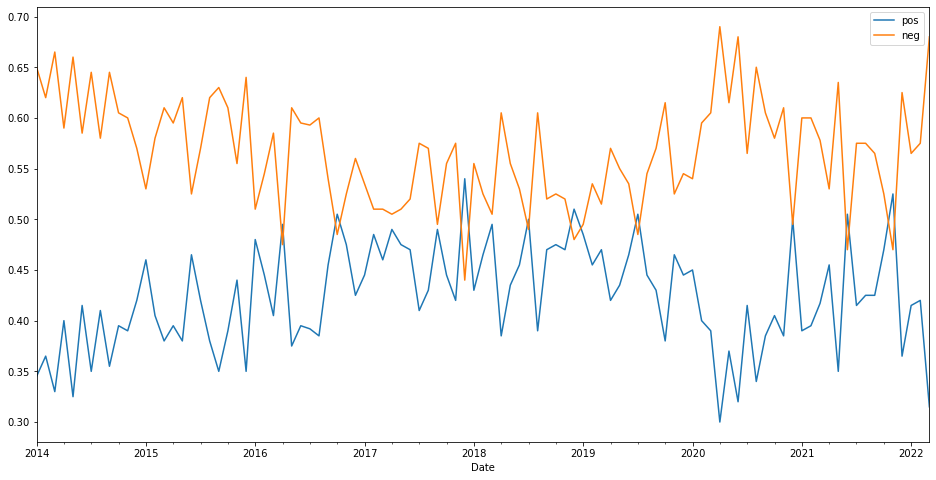

In [21]:
sum_all[["pos","neg"]].plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

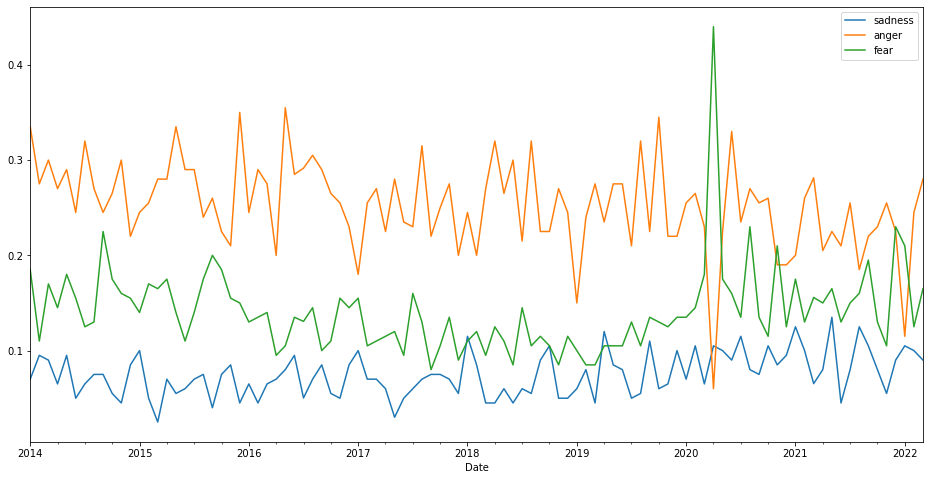

In [22]:
sum_all[["sadness","anger","fear"]].plot(figsize=(16,8))